In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sinfo import sinfo
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.tools as tls
import matplotlib.ticker as ticker

# Datenaufbereitung und Visualisierung - Modularbeit von Enes Yasaroglu

## Inhaltsverzeichnis

1. [Aufgaben](#kapitel1)

    * [Hypothesengenerierung & Datenbeschaffung](#aufgabe1)
    * [Datenaufbereitung](#aufgabe2)
    * [Überblick Datensatz](#aufgabe3)
    * [Ausreißeranalyse](#aufgabe4)
    * [Anonymisierung](#aufgabe5)
    * [Info-Grafik](#aufgabe6)
    * [Bonus](#aufgabe7)
2. [Literaturverzeichnis](#kapitel2)

## Aufgaben<a class="anchor" id="kapitel1"></a>

### Aufgabe 1 (Hypothesengenerierung & Datenbeschaffung) <a class="anchor" id="#aufgabe1"></a>

Gewählten sustainable development goals:

* $8.$ Menschenwürdige Arbeit und Wirtschaftswachstum
* $10.$ Weniger Ungleichheiten

#### Arbeitshypothese

"Die produktive Vollbeschäftigung sowie die Erreichung weniger Ungleichheiten auf dem Arbeitsmarkt<br>wurde durch verschiedene Maßnahmen innerhalb der Jahre 2000 - 2022 weitgehend gefördert." 


##### Um diese Hypothese zu überprüfen werden die Datensätze: 
* Indikatorenatlas: Arbeitsmarkt - Arbeitslosen - Anteil (https://opendata.muenchen.de/dataset/indikatorenatlas-2014-arbeitsmarkt-arbeitslosendichte-83r65mct)
* Indikatorenatlas: Bevölkerung - Migrationshintergrund (https://opendata.muenchen.de/dataset/indikatorenatlas-bevoelkerung-migrationshintergrund-83r65mct)
<br><br>
von der Open Data Seite der Stadt München (https://opendata.muenchen.de/) weitgehend analysiert.

##### Begründung der Auswahl:
Die Datensätze bieten qualitative Daten in Bezug auf den Arbeitsmarkt und Migrationshintergrund der Stadt München. 
<br><br>
Sie bieten eine gute Grundlage um die Arbeitshypothese zu untersuchen. 
<br><br>
In der Datenaufbereitung wird detailliert darauf eingegangen worauf die Datensätze genau analysiert.


### Aufgabe 2 (Datenaufbereitung)<a class="anchor" id="aufgabe2"></a>

Indikatorenatlas: Arbeitsmarkt - Arbeitslosen - Anteil
* Beobachtung der Entwicklung der Arbeitslosenquote in München. 
* Gab es einen Anstieg der Vollbeschäftigung? 
* Wurde die Ungleichheit zwischen Männer und Frauen auf dem Arbeitsmarkt reduziert?

In [2]:
# Datensatz laden und Spalten als kategorial oder metrisch deklarieren
daten_arbeitslose = pd.read_csv("data/indikat_arbeitsmarkt_arbeitslose_-_anteil_280823.csv")

numerisch_arbeitslose = ["Indikatorwert", "Basiswert.1", "Basiswert.2"]
kategorisch_arbeitslose = ["Indikator", "Ausprägung", "Jahr", "Raumbezug", "Name.Basiswert.1", "Name.Basiswert.2"]

daten_arbeitslose[numerisch_arbeitslose] = daten_arbeitslose[numerisch_arbeitslose].apply(pd.to_numeric)
daten_arbeitslose[kategorisch_arbeitslose] = daten_arbeitslose[kategorisch_arbeitslose].astype("category")

Indikatorenatlas: Bevölkerung - Migrationshintergrund
* Beobachtung Arbeitsmarktungleichheiten zwischen Orten innerhalb Münchens mit höchstem und geringstem Anteil an Deutschen mit Migrationshintergrund.

In [3]:
# Datensatz laden und Spalten als kategorial oder metrisch deklarieren
daten_migrationshintergrund = pd.read_csv("data/indikat_bevoelkerung_migrationshintergrund_240723.csv")

numerisch_migrationshintergrund = ["Indikatorwert", "Basiswert.1", "Basiswert.2"]
kategorisch_migrationshintergrund = ["Indikator", "Ausprägung", "Jahr", "Raumbezug", "Name.Basiswert.1", "Name.Basiswert.2"]

daten_arbeitslose[numerisch_migrationshintergrund] = daten_arbeitslose[numerisch_migrationshintergrund].apply(pd.to_numeric)
daten_arbeitslose[kategorisch_migrationshintergrund] = daten_arbeitslose[kategorisch_migrationshintergrund].astype("category")

In beiden Datensätzen:
<br>
Indikatorwert: Basiswert.1 / Basiswert.2
<br>
Basiswert.1: Anzahl Name.Basiswert.1
<br>
Basiswert.2: Anzahl Name.Basiswert.2

#### Begründung kategorial oder metrisch?
Beide Datensätze haben die gleichen Spaltennamen. Hierbei sind zwischen kategorialen und metrischen Spalten zu unterscheiden.

##### Numerische Spalten
Die Spalten Indikatorwert, Basiswert.1 und Basiswert.2 beinhalten ausschließlich Zahlen. Dies ist die Grundvoraussetzung einer metrischen Spalte.

Indikatorwert: Basiswert.1/Basiswert.2
<br>Basiswert.1: Anzahl Name.Basiswert.1 
<br>Basiswert.2: Anzahl Name.Basiswert.2

Durch mathematische Operationen an den Daten können sinvolle Informationen gewonnen werden. Die Daten haben eine Ordnung und das arithmetische Mittel ist logisch interpretierbar. Dies lässt schließen, dass die Spalten als metrisch einzuordnen sind. 


##### Kategorische Spalten
Die restlichen Spalten (außer Jahr) beinhalten ausschließlich Daten mit dem Datentyp String und können somit keine metrische Spalte sein. Deshalb werden diese als kategoriale Spalten betrachtet.

Die Spalte Jahr besteht genauso wie die metrischen Spalten nur aus Zahlen und sie besitzen auch eine Ordnung, jedoch ist das arithmetische Mittel nicht logisch interpretierbar. Desweiteren bringen mathematische Operationen keinen Informationsgewinn weshalb die Spalte Jahr als kategoriale Spalte eingeordnet wird.
 

#### Fehlende Werte?

In [4]:
fehlende_werte_arbeitslose = daten_arbeitslose.isnull().sum().sum()
fehlende_werte_migrationshintergrund = daten_migrationshintergrund.isnull().sum().sum()

print(f"Im Datensatz 'Indikatorenatlas: Arbeitsmarkt - Arbeitslosen' - Anteil gibt es {fehlende_werte_arbeitslose} fehlende Werte.")
print(f"Im Datensatz 'Indikatorenatlas: Bevölkerung - Migrationshintergrund' gibt es {fehlende_werte_migrationshintergrund} fehlende Werte.")


Im Datensatz 'Indikatorenatlas: Arbeitsmarkt - Arbeitslosen' - Anteil gibt es 0 fehlende Werte.
Im Datensatz 'Indikatorenatlas: Bevölkerung - Migrationshintergrund' gibt es 29952 fehlende Werte.


Schaut man sich den Datensatz 'Indikatorenatlas: Bevölkerung - Migrationshintergrund' genauer an kann man festtellen wo sich die fehlenden Werte befinden.

In [5]:
fehlende_werte_migrationshintergrund_übersicht = daten_migrationshintergrund.isnull().sum()

print(fehlende_werte_migrationshintergrund_übersicht)

Indikator              0
Ausprägung             0
Jahr                   0
Raumbezug              0
Indikatorwert          0
Basiswert.1            0
Basiswert.2            0
Basiswert.3         4992
Basiswert.4         4992
Basiswert.5         4992
Name.Basiswert.1       0
Name.Basiswert.2       0
Name.Basiswert.3    4992
Name.Basiswert.4    4992
Name.Basiswert.5    4992
dtype: int64


Die Spalten Basiswert.3-5 sowie Name.Basiswert3-5 weisen 4992 fehlende Werte auf.

In [6]:
anzahl_zeilen, anzahl_spalten = daten_migrationshintergrund.shape

print(f"Der Datensatz 'Indikatorenatlas - Migrationshintergrund' hat {anzahl_zeilen} Zeilen und {anzahl_spalten} Spalten")

Der Datensatz 'Indikatorenatlas - Migrationshintergrund' hat 4992 Zeilen und 15 Spalten


Somit sind die gesamten Spalten Basiswert.3-5 und Name.Basiswert.3-5 leer und können aus dem Datensatz gelöscht werden 

In [7]:
daten_migrationshintergrund = daten_migrationshintergrund.drop(columns=["Basiswert.3", "Basiswert.4", "Basiswert.5", "Name.Basiswert.3", "Name.Basiswert.4", "Name.Basiswert.5"])

### Aufgabe 3 (Überblick Datensatz) <a class="anchor" id="aufgabe3"></a>

In [8]:
# Überblick Datensatz Indikatorenatlas: Arbeitsmarkt - Arbeitslosen - Anteil
daten_arbeitslose.info()
daten_arbeitslose.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2990 entries, 0 to 2989
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Indikator         2990 non-null   category
 1   Ausprägung        2990 non-null   category
 2   Jahr              2990 non-null   category
 3   Raumbezug         2990 non-null   category
 4   Indikatorwert     2990 non-null   float64 
 5   Basiswert.1       2990 non-null   float64 
 6   Basiswert.2       2990 non-null   float64 
 7   Name.Basiswert.1  2990 non-null   category
 8   Name.Basiswert.2  2990 non-null   category
dtypes: category(6), float64(3)
memory usage: 90.4 KB


,Indikatorwert,Basiswert.1,Basiswert.2
count,2990.000000,2990.000000,2.990000e+03
mean,4.240201,1848.660033,4.577146e+04
std,1.487104,4875.488434,1.203318e+05
min,1.600000,89.000000,3.308800e+03
25%,3.200000,605.575000,1.441658e+04
50%,3.900000,836.900000,2.145765e+04
75%,5.000000,1262.700000,3.300535e+04
max,13.000000,60348.800000,1.102827e+06


In [9]:
print("Spalte Name.Basiswert.1:")
for x in daten_arbeitslose["Name.Basiswert.1"].unique():
    print(x)
print("")
print("Spalte Name.Basiswert.2:")
for x in daten_arbeitslose["Name.Basiswert.2"].unique():
    print(x)

Spalte Name.Basiswert.1:
Arbeitslose (deutsch)
Arbeitslose (insgesamt)
Arbeitslose (männlich)
Arbeitslose (nichtdeutsch)
Arbeitslose (weiblich)

Spalte Name.Basiswert.2:
Hauptwohnsitzbevölkerung (15 bis 64 Jahre) (deutsch)
Hauptwohnsitzbevölkerung (15 bis 64 Jahre) (insgesamt)
Hauptwohnsitzbevölkerung (15 bis 64 Jahre) (männlich)
Hauptwohnsitzbevölkerung (15 bis 64 Jahre) (nichtdeutsch)
Hauptwohnsitzbevölkerung (15 bis 64 Jahre) (weiblich)


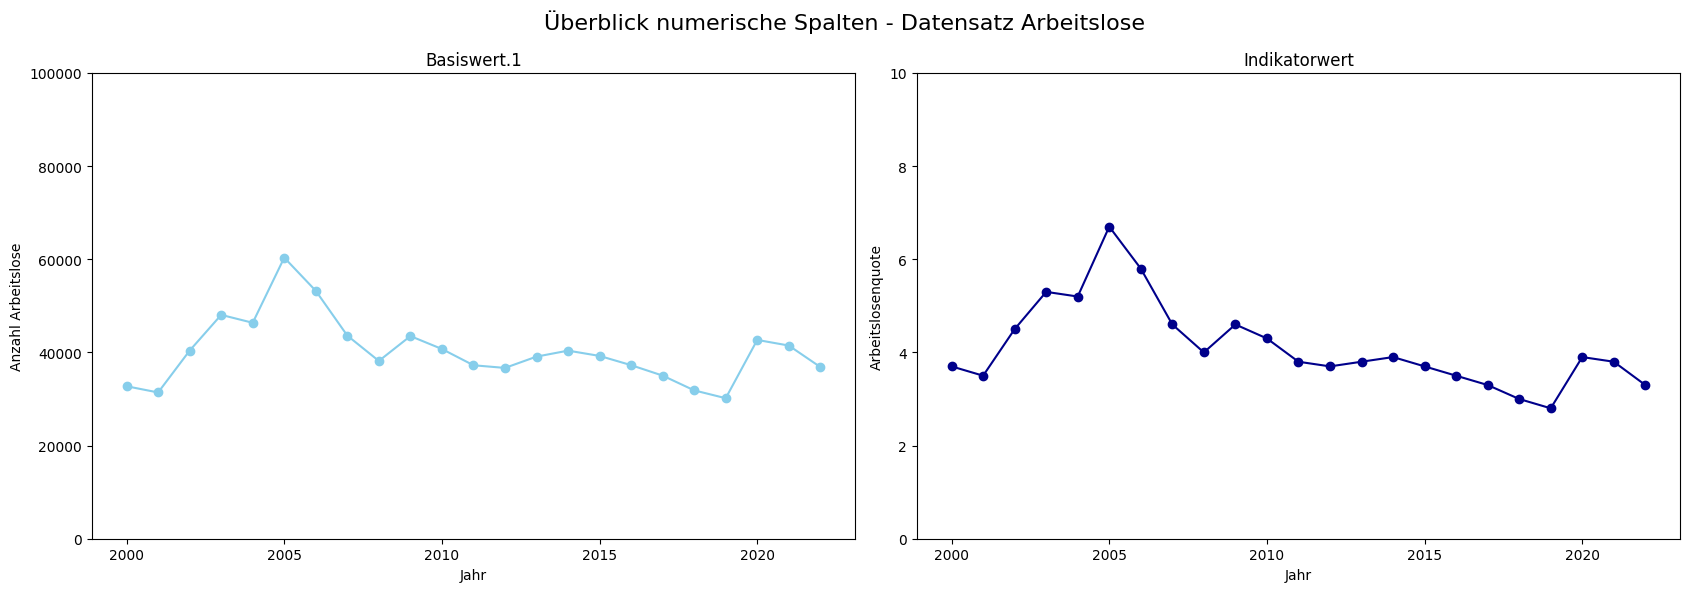

In [10]:
# Daten nach Stadt München filtern um Visualisierung interpretieren zu können
daten_arbeitslose_münchen_insgesamt = daten_arbeitslose[(daten_arbeitslose["Name.Basiswert.2"] == "Hauptwohnsitzbevölkerung (15 bis 64 Jahre) (insgesamt)") & (daten_arbeitslose["Raumbezug"] == "Stadt München")]

fig, axes = plt.subplots(1, 2, figsize=(17, 6))

axes[0].plot(daten_arbeitslose_münchen_insgesamt["Jahr"], daten_arbeitslose_münchen_insgesamt["Basiswert.1"], marker="o", color="skyblue")
axes[0].set_title("Basiswert.1")
axes[0].set_xlabel("Jahr")
axes[0].set_ylabel("Anzahl Arbeitslose")
axes[0].set_ylim(0, 100000)

axes[1].plot(daten_arbeitslose_münchen_insgesamt["Jahr"], daten_arbeitslose_münchen_insgesamt["Indikatorwert"], marker="o", color="darkblue")
axes[1].set_title("Indikatorwert")
axes[1].set_xlabel("Jahr")
axes[1].set_ylabel("Arbeitslosenquote")
axes[1].set_ylim(0, 10)

fig.suptitle("Überblick numerische Spalten - Datensatz Arbeitslose", fontsize=16)


plt.tight_layout()
plt.show()

In [11]:
daten_arbeitslose_münchen_insgesamt.describe()

,Indikatorwert,Basiswert.1,Basiswert.2
count,23.000000,23.000000,2.300000e+01
mean,4.117391,40282.869565,9.917151e+05
std,0.922769,7017.644418,7.598045e+04
min,2.800000,30167.000000,8.934108e+05
25%,3.600000,36769.000000,9.143739e+05
50%,3.800000,39247.000000,9.785793e+05
75%,4.550000,43093.400000,1.072139e+06
max,6.700000,60348.800000,1.102827e+06


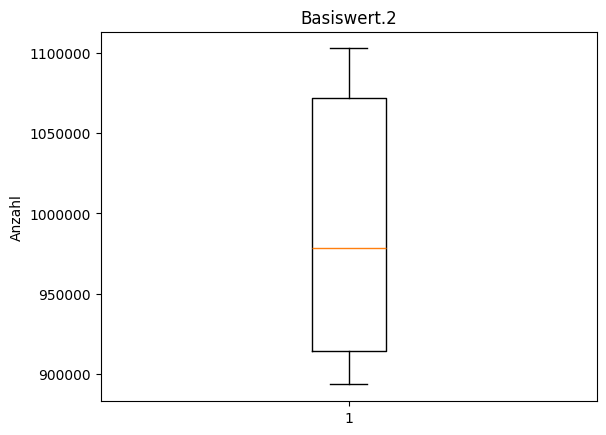

In [12]:
# Ermöglicht es hohe Zahlen auf der Y-Achse ohne die 1e6 Notation zu plotten
formatter = ticker.ScalarFormatter(useOffset=False) 
formatter.set_scientific(False) 


fig, axes = plt.subplots()
axes.boxplot(daten_arbeitslose_münchen_insgesamt["Basiswert.2"])
axes.set_title("Basiswert.2")
axes.yaxis.set_major_formatter(formatter)
axes.set_ylabel("Anzahl")
None

Der Median liegt somit wie erwartet bei ca. 980000.

In [13]:
# Überblick Datensatz Indikatorenatlas: Bevölkerung - Migrationshintergrund
daten_migrationshintergrund.info()
daten_migrationshintergrund.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4992 entries, 0 to 4991
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Indikator         4992 non-null   object 
 1   Ausprägung        4992 non-null   object 
 2   Jahr              4992 non-null   int64  
 3   Raumbezug         4992 non-null   object 
 4   Indikatorwert     4992 non-null   float64
 5   Basiswert.1       4992 non-null   int64  
 6   Basiswert.2       4992 non-null   int64  
 7   Name.Basiswert.1  4992 non-null   object 
 8   Name.Basiswert.2  4992 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 351.1+ KB


,Jahr,Indikatorwert,Basiswert.1,Basiswert.2
count,4992.000000,4992.000000,4992.000000,4.992000e+03
mean,2013.937500,31.033093,10513.698918,3.272262e+04
std,5.043678,15.784817,41844.137449,1.160671e+05
min,2006.000000,7.700000,106.000000,9.950000e+02
25%,2009.750000,16.200000,1322.750000,5.031750e+03
50%,2013.500000,30.100000,2684.500000,9.131000e+03
75%,2018.250000,42.900000,7274.750000,2.545100e+04
max,2022.000000,80.100000,761062.000000,1.588330e+06


In [14]:
print("Spalte Name.Basiswert.1:")
for x in daten_migrationshintergrund["Name.Basiswert.1"].unique():
    print(x)
print("")
print("Spalte Name.Basiswert.2:")
for x in daten_migrationshintergrund["Name.Basiswert.2"].unique():
    print(x)

Spalte Name.Basiswert.1:
Hauptwohnsitzbevölkerung (mit Migrationshintergrund) (deutsch)
Hauptwohnsitzbevölkerung (mit Migrationshintergrund) (deutsch) (bis 17 Jahre)
Hauptwohnsitzbevölkerung (mit Migrationshintergrund) (deutsch und nichtdeutsch)
Hauptwohnsitzbevölkerung (mit Migrationshintergrund) (deutsch und nichtdeutsch) (bis 17 Jahre)
Hauptwohnsitzbevölkerung (mit Migrationshintergrund) (deutsch und nichtdeutsch) (18 bis 24 Jahre)
Hauptwohnsitzbevölkerung (mit Migrationshintergrund) (deutsch und nichtdeutsch) (25 bis 54 Jahre)
Hauptwohnsitzbevölkerung (mit Migrationshintergrund) (deutsch und nichtdeutsch) (55 bis 64 Jahre)
Hauptwohnsitzbevölkerung (mit Migrationshintergrund) (deutsch und nichtdeutsch) (65 Jahre und älter)
Hauptwohnsitzbevölkerung (mit Migrationshintergrund) (deutsch) (18 bis 24 Jahre)
Hauptwohnsitzbevölkerung (mit Migrationshintergrund) (deutsch) (25 bis 54 Jahre)
Hauptwohnsitzbevölkerung (mit Migrationshintergrund) (deutsch) (55 bis 64 Jahre)
Hauptwohnsitzbevölker

Da uns der Anteil der Menschen mit Migrationshintergrund an der gesamten Bevölkerung Münchens interessiert 
<br> filtern wir die Zeilen des Datensatzes nach Hauptwohnsitzbevölkerung (deutsch und nichtdeutsch) in der Spalte Name.Basiswert.1
<br> und Hauptwohnsitzbevölkerung (mit Migrationshintergrund) (deutsch und nichtdeutsch) in der Spalte Name.Basiswert.2

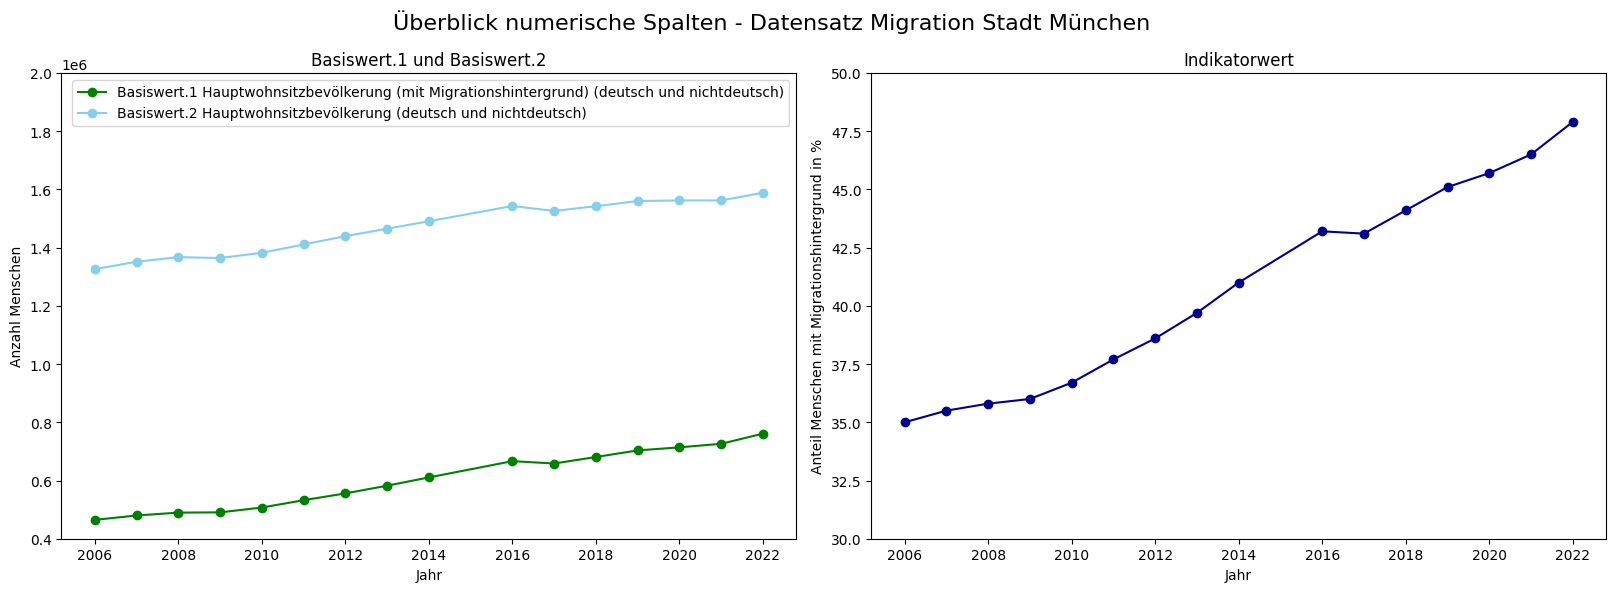

In [15]:
# Daten filtern und visualisieren
daten_migrationshintergrund_d_und_nd = daten_migrationshintergrund[daten_migrationshintergrund["Name.Basiswert.2"] == "Hauptwohnsitzbevölkerung (deutsch und nichtdeutsch)"]
daten_migrationshintergrund_d_und_nd_münchen = daten_migrationshintergrund_d_und_nd[daten_migrationshintergrund_d_und_nd["Raumbezug"] == "Stadt München"]
daten_arbeitslose_stadtteile_insgesamt = daten_arbeitslose[(daten_arbeitslose["Name.Basiswert.2"] == "Hauptwohnsitzbevölkerung (15 bis 64 Jahre) (insgesamt)") & (daten_arbeitslose["Raumbezug"] != "Stadt München")]

fig, axes = plt.subplots(1, 2, figsize=(17, 6))

axes[0].plot(daten_migrationshintergrund_d_und_nd_münchen["Jahr"], daten_migrationshintergrund_d_und_nd_münchen["Basiswert.1"], marker="o", color="green", label="Basiswert.1 Hauptwohnsitzbevölkerung (mit Migrationshintergrund) (deutsch und nichtdeutsch)")
axes[0].plot(daten_migrationshintergrund_d_und_nd_münchen["Jahr"], daten_migrationshintergrund_d_und_nd_münchen["Basiswert.2"], marker="o", color="skyblue", label="Basiswert.2 Hauptwohnsitzbevölkerung (deutsch und nichtdeutsch)")
axes[0].set_title("Basiswert.1 und Basiswert.2")
axes[0].set_xlabel("Jahr")
axes[0].set_ylabel("Anzahl Menschen")
axes[0].set_ylim(400000, 2000000)
axes[0].legend()

axes[1].plot(daten_migrationshintergrund_d_und_nd_münchen["Jahr"], daten_migrationshintergrund_d_und_nd_münchen["Indikatorwert"], marker="o", color="darkblue")
axes[1].set_title("Indikatorwert")
axes[1].set_xlabel("Jahr")
axes[1].set_ylabel("Anteil Menschen mit Migrationshintergrund in %")
axes[1].set_ylim(30, 50)

fig.suptitle("Überblick numerische Spalten - Datensatz Migration Stadt München", fontsize=16)


plt.tight_layout()
plt.show()

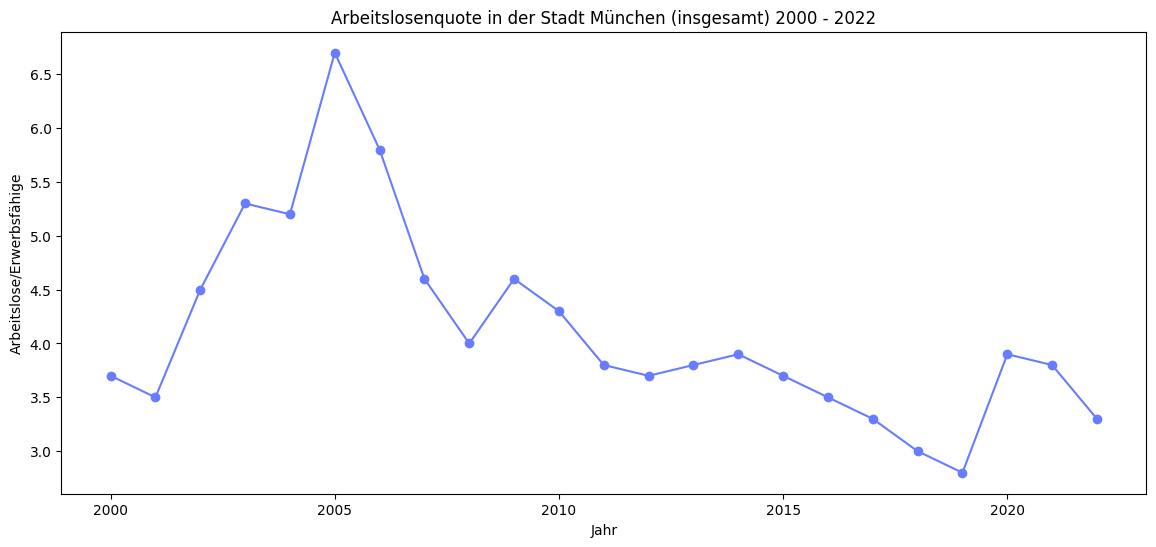

In [16]:
plt.figure(figsize=(14, 6))  
plt.plot(daten_arbeitslose_münchen_insgesamt["Jahr"], daten_arbeitslose_münchen_insgesamt["Indikatorwert"], marker="o", color="#687CFF")
plt.xlabel("Jahr")  
plt.ylabel("Arbeitslose/Erwerbsfähige") 
plt.title("Arbeitslosenquote in der Stadt München (insgesamt) 2000 - 2022")  

plt.show()


Anhand der Grafik ist zu erknnen, dass die produktive Vollbeschäftigung im Allgemeinen erreicht wurde durch verschiedene Maßnahmen sank die Arbeitslosenquote Münchens über die letzten Jahre. Diese Entwicklung wird in der Info-Grafik näher analysiert.

### Ungleichheit auf dem Arbeitsmarkt Jahr 2006:

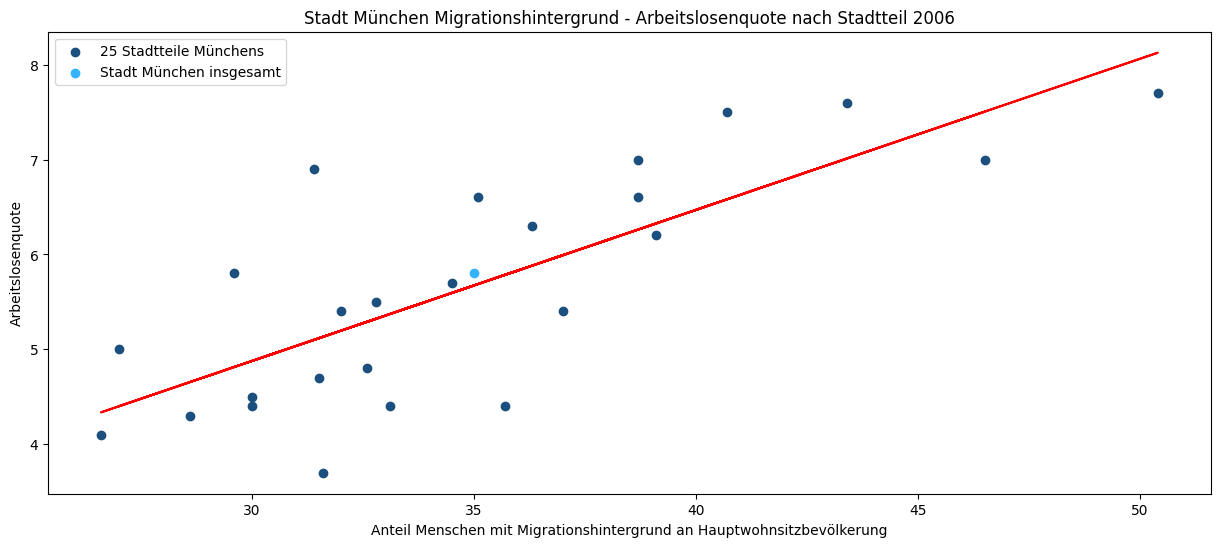

In [17]:
# Daten filtern und visualisieren
daten_migrationshintergrund_d_und_nd_2006 = daten_migrationshintergrund_d_und_nd[daten_migrationshintergrund_d_und_nd["Jahr"] == 2006]
alq_2006_stadtteile = list(daten_arbeitslose[daten_arbeitslose["Name.Basiswert.2"] == "Hauptwohnsitzbevölkerung (15 bis 64 Jahre) (insgesamt)"][daten_arbeitslose[daten_arbeitslose["Name.Basiswert.2"] == "Hauptwohnsitzbevölkerung (15 bis 64 Jahre) (insgesamt)"]["Jahr"] == 2006]["Indikatorwert"])

# Durch Lineare Regression Gerade durch die Datenpunkte legen um Trend zu erkennen
X = np.array(daten_migrationshintergrund_d_und_nd_2006["Indikatorwert"][1:]).reshape(-1, 1)
y = np.array(alq_2006_stadtteile[1:])

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.subplots(figsize=(15, 6))
plt.scatter(list(daten_migrationshintergrund_d_und_nd_2006["Indikatorwert"])[1:], alq_2006_stadtteile[1:], label="25 Stadtteile Münchens", color="#1B4F7D")
plt.scatter(list(daten_migrationshintergrund_d_und_nd_2006["Indikatorwert"])[0], alq_2006_stadtteile[0], label="Stadt München insgesamt",color="#35B3FC")
plt.plot(X, y_pred, color="red")
plt.xlabel("Anteil Menschen mit Migrationshintergrund an Hauptwohnsitzbevölkerung")
plt.ylabel("Arbeitslosenquote")
plt.title("Stadt München Migrationshintergrund - Arbeitslosenquote nach Stadtteil 2006")
plt.legend()
None

Anhand der Grafik ist zu erkennen, dass im Jahr 2006 Stadtteile in München mit höherem Anteil an Menschen mit Migrationshintergrund auch eine höhere Arbeitslosenquote aufweisen im gegensatz zu Stadtteilen mit geringerem Anteil an Menschen mit Migrationshintergrund. 
<br><br>
Diese Ungleichheit spiegelt auch die durch Lineare Regression durchgelegete Gerade wider. In der Aufgabenstellung 6 soll geprüft werden ob diese Ungleichheit über die Zeit weniger geworden ist zwischen den jeweiligen Stadtteilen. Desweiteren wird auch auf die Ungleichheit zwischen Männern und Frauen sowie Deutschen und Nichtdeutschen eingegangen.

### Aufgabe 4 (Ausreißeranalyse) <a class="anchor" id="aufgabe4"></a>

Ab dem Jahr 2020 ist ein plötzlicher Anstieg der Arbeitslosenquote in der Stadt München zu beobachten. Der Grund hierfür ist die Corona Pandemie, welche weltweit große Einschränkungen im Arbeitsmarkt mit sich brachte. Viele verloren ihren Arbeitsplatz. In dieser Modularbeit soll überprüft werden ob die Stadt München ihrem Ziel der produktiven Vollbeschäftigung nähergekommen ist, jedoch hat die Stadt München keine Schuld an dem Ausbruch einer weltweiten Pandemie. Deshalb muss entschieden werden wie mit diesem Ausreißer umzugehen ist.

##### Optionen für den Umgang mit Ausreißer

* Durch Recherche ermitteln wie viele Menschen in der Stadt München ab 2020 aufgrund der Corona Pandemie arbeitslos wurden <br> und diese von der Analyse ausschließen. Dadurch wird ein klares Bild der zugrundeliegenden Trends erreicht.

* Daten unverändert lassen und im Report die Ursache sowie Interpretierbarkeit des Ausreißers erklären.

In unserem Fall lassen wir die Daten unverändert. 

##### Warum können extreme Beobachtungen problematisch sein?

Extreme Beobachtungen können spezifische Gründe haben die nichts mit dem eigentlichen Pattern zutun haben. <br>Dadurch wird der Mittelwert ungewollt verschoben wodurch erweiterte Datenanalyse sehr grob und ungenau wird.

##### Ansatz zum Handling dieser Beobachtungen.

Man kann einen Boxplot machen und dadurch die Außreißer identifizieren.
<br> Diese Ausreißer können im Verlauf der Datenanalyse ignoriert werden um bessere Ergebnisse zu erzielen.

### Aufgabe 5 (Anonymisierung) <a class="anchor" id="aufgabe5"></a>

In den verwendeten Datensätzen gibt es keine Probleme bezüglich Anonymisierung, da sie keine personenbezogenen Daten enthalten.

##### Beispiel und möglicher Lösungsansatz:

Ein Problem bezüglich der Anonymisierung gäbe es bei Online-Shops, da Kunden sensible Daten wie Name, Adresse und Bankdaten angeben müssen. <br>Diesem Problem kann entgegengewirkt werden indem man die Daten z.B. durch den RSA-Algorithmus verschlüsselt und sie somit vor möglichen Angreifern schützt. Zwar kann der Angreifer die Daten immernoch abfangen, jedoch hat er nur die verschlüsselten Daten welche ohne den privaten Schlüssel unbrauchbar sind. 

### Aufgabe 6 (Info-Grafik) <a class="anchor" id="aufgabe6"></a>

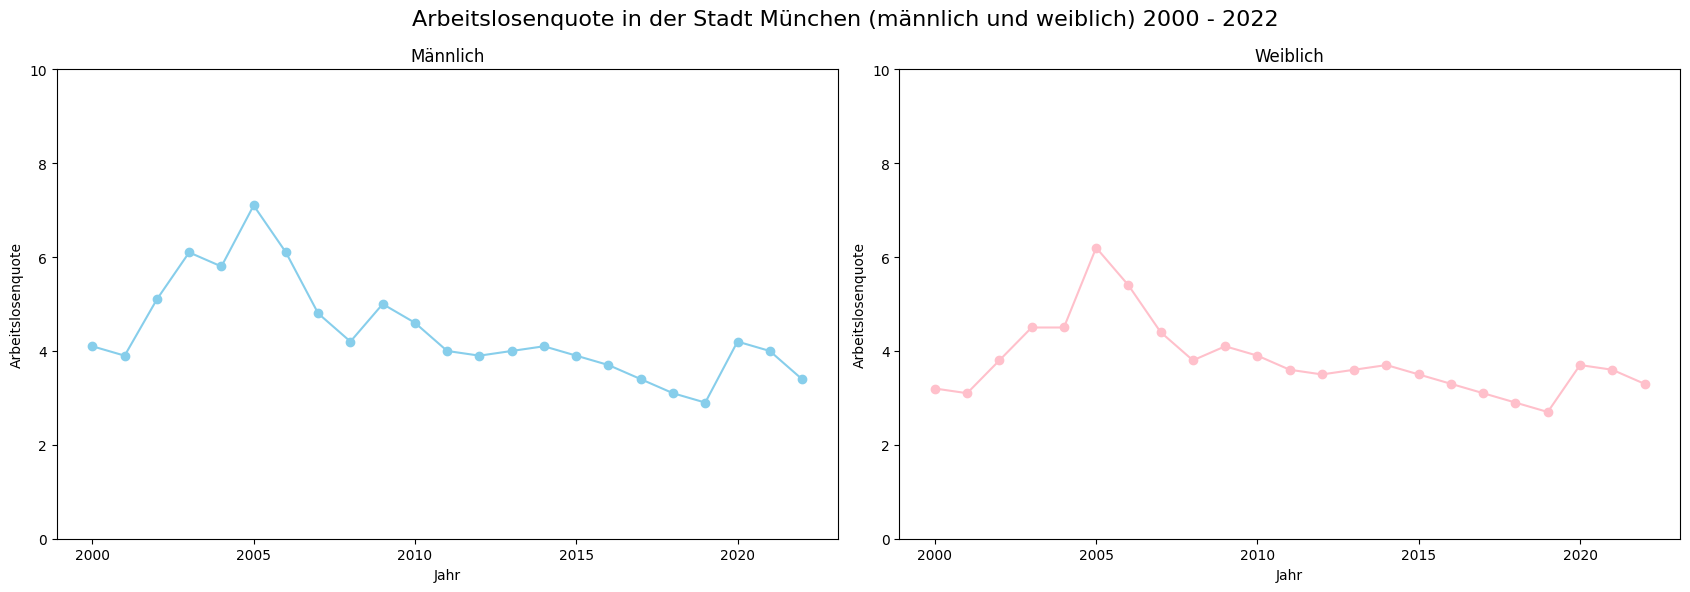

In [18]:
# Daten nach Männlich und Weiblich filtern und visualisieren
daten_arbeitslose_münchen_männlich = daten_arbeitslose[(daten_arbeitslose["Name.Basiswert.2"] == "Hauptwohnsitzbevölkerung (15 bis 64 Jahre) (männlich)") & (daten_arbeitslose["Raumbezug"] == "Stadt München")]

daten_arbeitslose_münchen_weiblich = daten_arbeitslose[(daten_arbeitslose["Name.Basiswert.2"] == "Hauptwohnsitzbevölkerung (15 bis 64 Jahre) (weiblich)") & (daten_arbeitslose["Raumbezug"] == "Stadt München")]

fig1, ax1 = plt.subplots(1, 2, figsize=(17, 6))

ax1[0].plot(daten_arbeitslose_münchen_männlich["Jahr"], daten_arbeitslose_münchen_männlich["Indikatorwert"], marker="o", color="skyblue")
ax1[0].set_title("Männlich")
ax1[0].set_xlabel("Jahr")
ax1[0].set_ylabel("Arbeitslosenquote")
ax1[0].set_ylim(0, 10)

ax1[1].plot(daten_arbeitslose_münchen_weiblich["Jahr"], daten_arbeitslose_münchen_weiblich["Indikatorwert"], marker="o", color="pink")
ax1[1].set_title("Weiblich")
ax1[1].set_xlabel("Jahr")
ax1[1].set_ylabel("Arbeitslosenquote")
ax1[1].set_ylim(0, 10)

fig1.suptitle("Arbeitslosenquote in der Stadt München (männlich und weiblich) 2000 - 2022", fontsize=16)


plt.tight_layout()
plt.show()

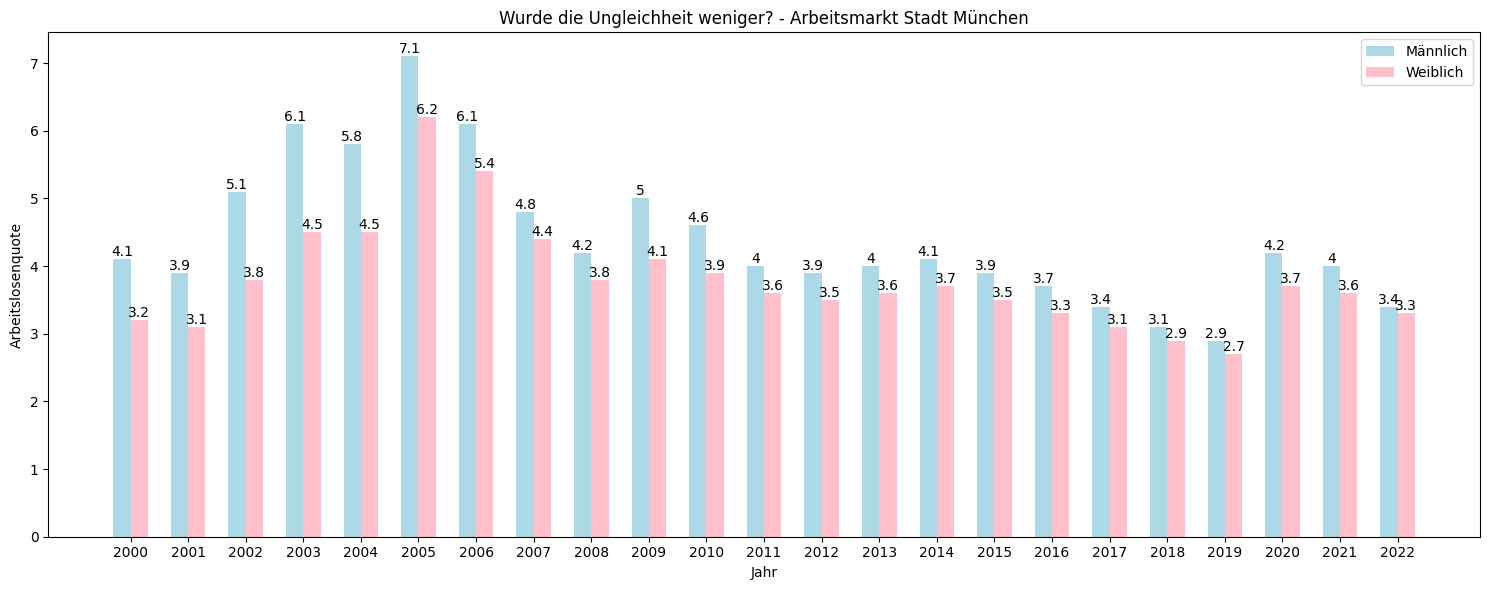

In [19]:
# Visualisierungen zusammenführen anhand Balkendiagramm
x = np.arange(len(daten_arbeitslose_münchen_insgesamt["Jahr"]))

width = 0.3

fig2, ax2 = plt.subplots(figsize=(15, 6))
balken_männlich = ax2.bar(x - width/2, daten_arbeitslose_münchen_männlich["Indikatorwert"][::-1], width, label="Männlich", color="lightblue")
balken_weiblich = ax2.bar(x + width/2, daten_arbeitslose_münchen_weiblich["Indikatorwert"][::-1], width, label="Weiblich", color="pink")

ax2.set_xlabel("Jahr")
ax2.set_ylabel("Arbeitslosenquote")
ax2.set_title("Wurde die Ungleichheit weniger? - Arbeitsmarkt Stadt München")
ax2.set_xticks(x)
ax2.set_xticklabels(daten_arbeitslose_münchen_insgesamt["Jahr"][::-1])
ax2.legend()
ax2.bar_label(balken_männlich)
ax2.bar_label(balken_weiblich)

fig2.tight_layout()

plt.show()

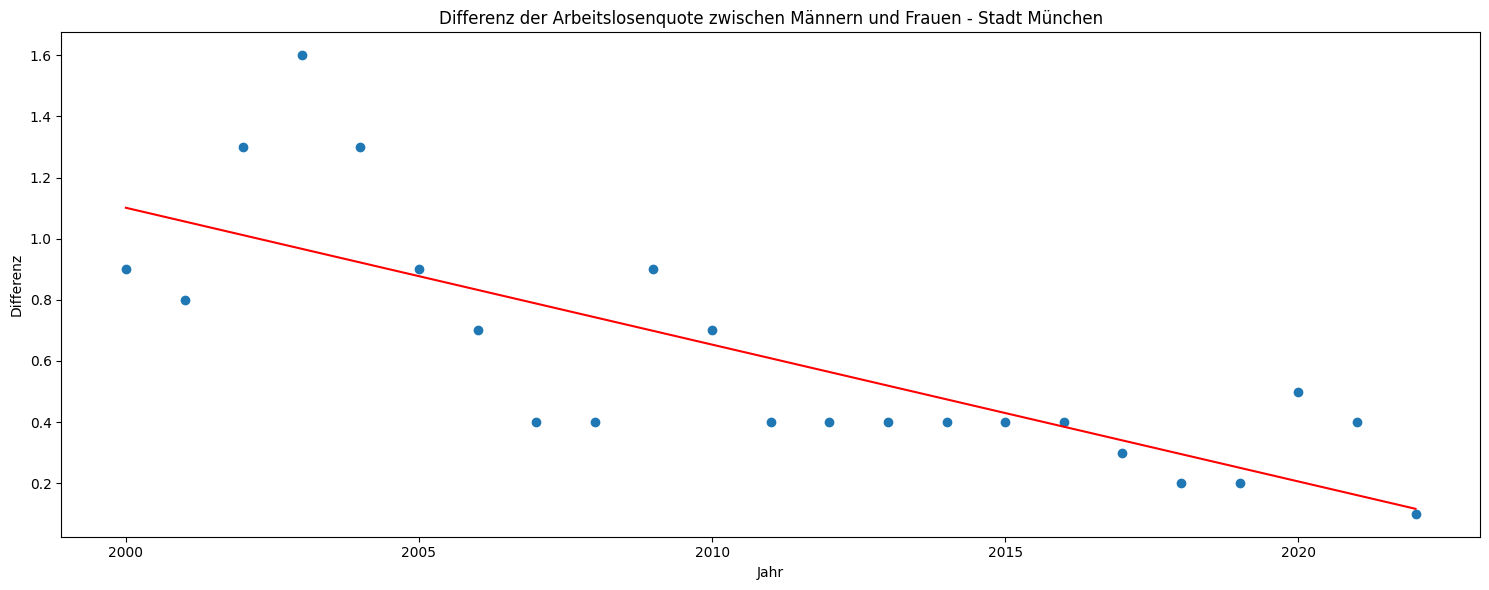

In [20]:
# Durch Lineare Regression Gerade durch die Datenpunkte legen um Trend zu erkennen
x = daten_arbeitslose_münchen_männlich["Jahr"][::-1]
Y1 =list(daten_arbeitslose_münchen_männlich["Indikatorwert"][::-1]) 
Y2 = list(daten_arbeitslose_münchen_weiblich["Indikatorwert"][::-1]) 
y = [y1 - y2 for y1, y2 in zip(Y1, Y2)]

X_fit = np.array(x).reshape(-1, 1)
y_fit = np.array(y)

model = LinearRegression()
model.fit(X_fit, y_fit)

y_pred = model.predict(X_fit)

fig3, ax3 = plt.subplots(figsize=(15, 6))

ax3.scatter(x, y)
ax3.plot(X_fit, y_pred, color="red")
ax3.set_xlabel("Jahr")
ax3.set_ylabel("Differenz")
ax3.set_title("Differenz der Arbeitslosenquote zwischen Männern und Frauen - Stadt München")
fig3.tight_layout()
plt.show()

Die Gerade zeigt, dass die Differenz der Arbeistlosenquote zwischen Männern und Frauen in der Stadt München einen sinkenden Trend aufweist. 
<br><br>
Somit wurde das Ziel der geringeren Ungleichheit auf dem Arbeitsmarkt zwischen Männern und Frauen gefördert. 
<br><br>
Im Jahr 2022 betrug die Differenz nur noch 0.1 % während sie 2000 noch bei 0.9 % und zwischenzeitlich sogar auf 1.6 % aufgestiegen war.

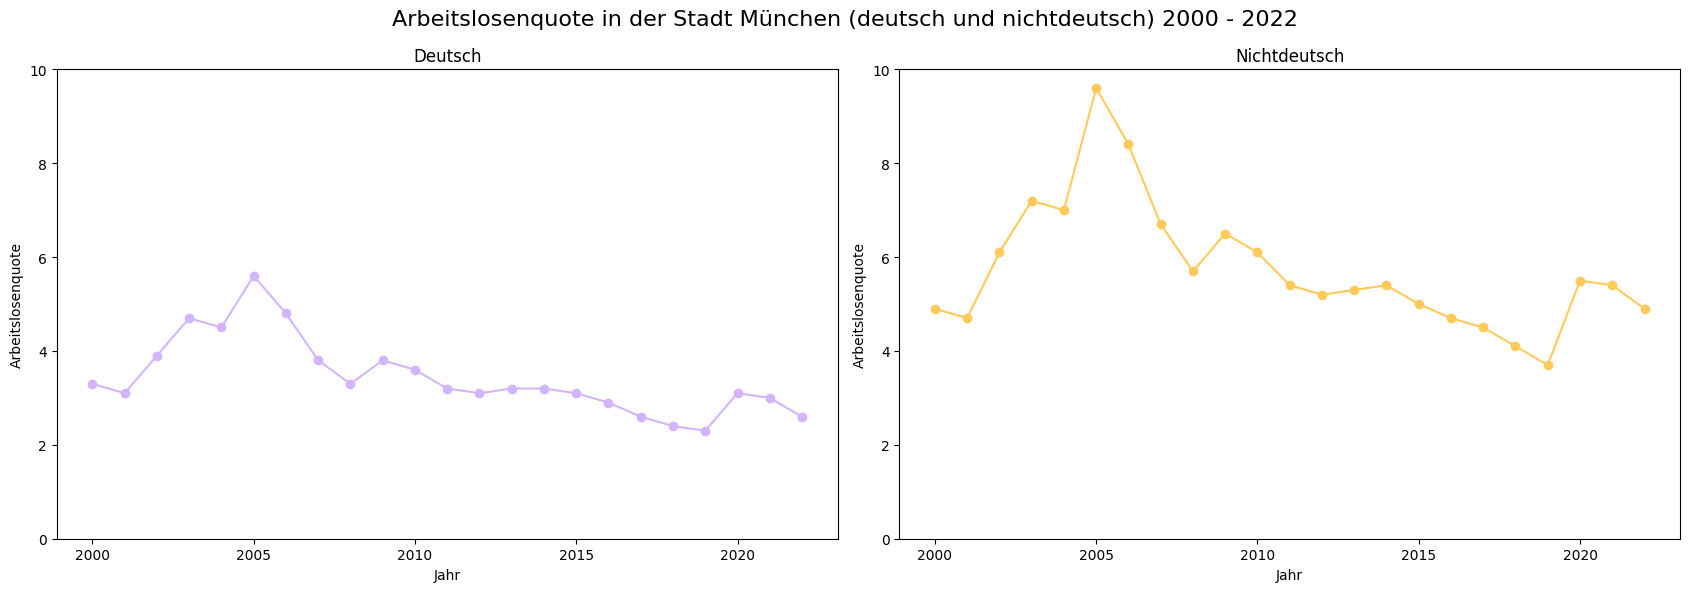

In [21]:
# Daten nach Deutsch und Nichtdeutsch filtern und visualisieren
daten_arbeitslose_münchen_deutsch = daten_arbeitslose[(daten_arbeitslose["Name.Basiswert.2"] == "Hauptwohnsitzbevölkerung (15 bis 64 Jahre) (deutsch)") & (daten_arbeitslose["Raumbezug"] == "Stadt München")]

daten_arbeitslose_münchen_nichtdeutsch = daten_arbeitslose[(daten_arbeitslose["Name.Basiswert.2"] == "Hauptwohnsitzbevölkerung (15 bis 64 Jahre) (nichtdeutsch)") & (daten_arbeitslose["Raumbezug"] == "Stadt München")]

fig4, ax4 = plt.subplots(1, 2, figsize=(17, 6))

ax4[0].plot(daten_arbeitslose_münchen_deutsch["Jahr"], daten_arbeitslose_münchen_deutsch["Indikatorwert"], marker="o", color="#D3B5FF")
ax4[0].set_title("Deutsch")
ax4[0].set_xlabel("Jahr")
ax4[0].set_ylabel("Arbeitslosenquote")
ax4[0].set_ylim(0, 10)

ax4[1].plot(daten_arbeitslose_münchen_nichtdeutsch["Jahr"], daten_arbeitslose_münchen_nichtdeutsch["Indikatorwert"], marker="o", color="#FFCA59")
ax4[1].set_title("Nichtdeutsch")
ax4[1].set_xlabel("Jahr")
ax4[1].set_ylabel("Arbeitslosenquote")
ax4[1].set_ylim(0, 10)

fig4.suptitle("Arbeitslosenquote in der Stadt München (deutsch und nichtdeutsch) 2000 - 2022", fontsize=16)


plt.tight_layout()
plt.show()

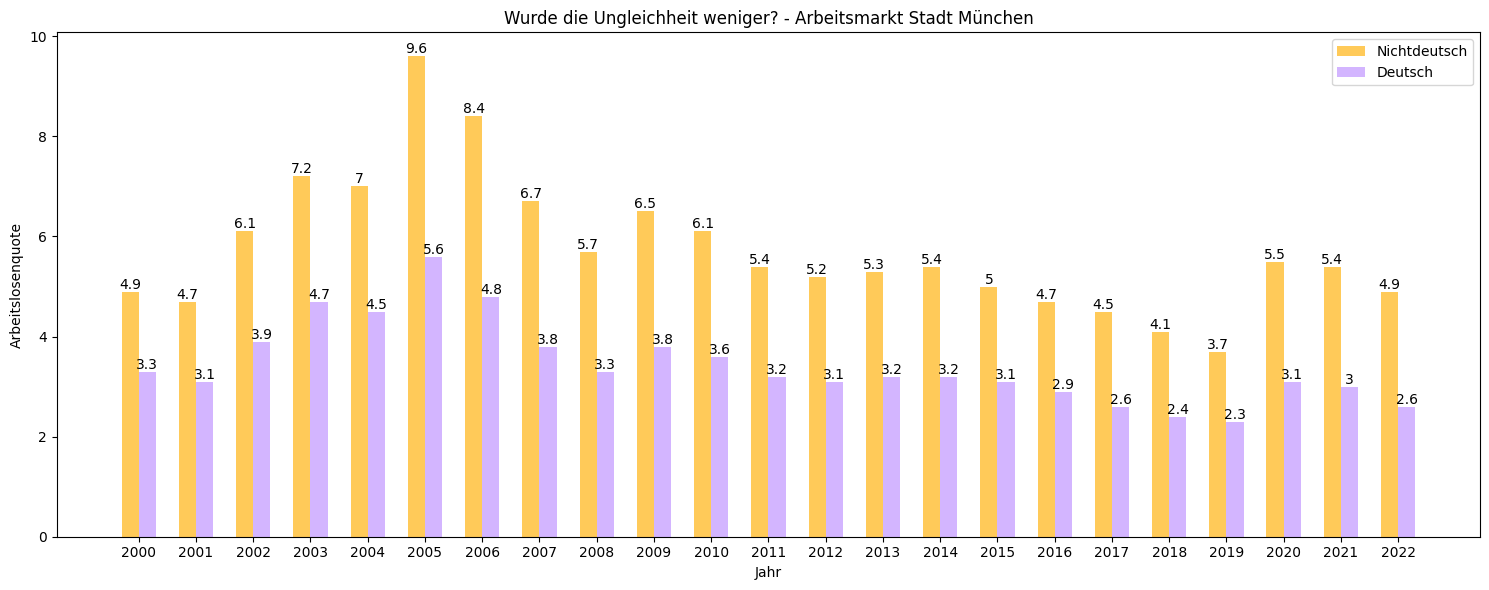

In [22]:
# Vorherige Visualisierungen zusammenführen durch Balkendiagramm
x = np.arange(len(daten_arbeitslose_münchen_insgesamt["Jahr"]))

width = 0.3

fig5, ax5 = plt.subplots(figsize=(15, 6))

balken_nichtdeutsch = ax5.bar(x - width/2, daten_arbeitslose_münchen_nichtdeutsch["Indikatorwert"][::-1], width, label="Nichtdeutsch", color="#FFCA59")
balken_deutsch = ax5.bar(x + width/2, daten_arbeitslose_münchen_deutsch["Indikatorwert"][::-1], width, label="Deutsch", color="#D3B5FF")


ax5.set_xlabel("Jahr")
ax5.set_ylabel("Arbeitslosenquote")
ax5.set_title("Wurde die Ungleichheit weniger? - Arbeitsmarkt Stadt München")
ax5.set_xticks(x)
ax5.set_xticklabels(daten_arbeitslose_münchen_insgesamt["Jahr"][::-1])
ax5.legend()
ax5.bar_label(balken_nichtdeutsch)
ax5.bar_label(balken_deutsch)


fig5.tight_layout()

plt.show()

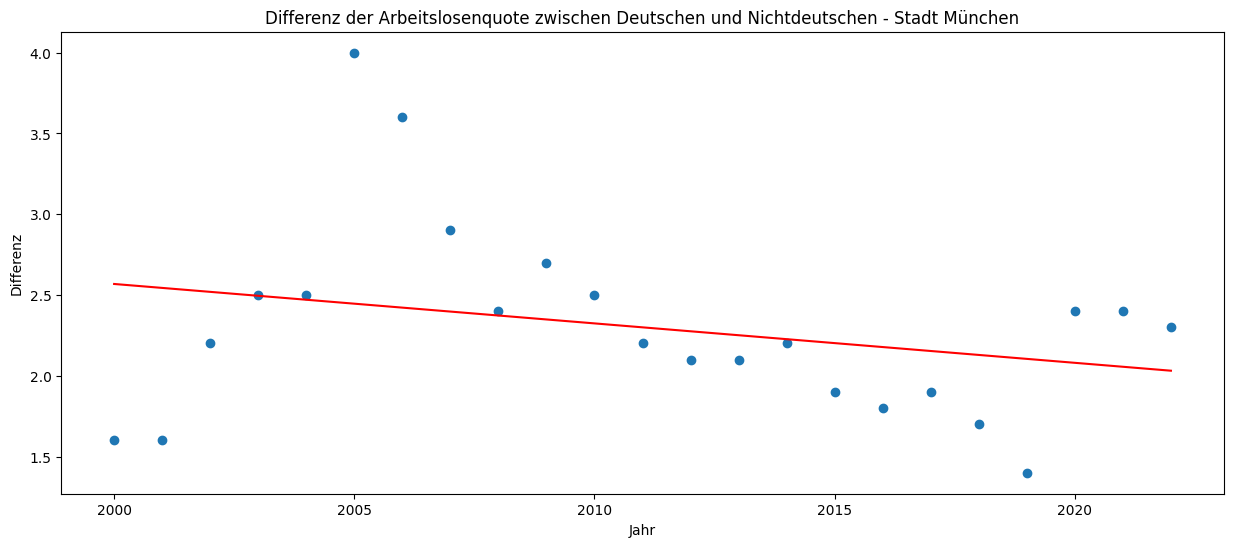

In [23]:
# Durch Lineare Regression Gerade durchlegen um Trend zu erkennen
x = daten_arbeitslose_münchen_nichtdeutsch["Jahr"][::-1]
Y1 =list(daten_arbeitslose_münchen_nichtdeutsch["Indikatorwert"][::-1]) 
Y2 = list(daten_arbeitslose_münchen_deutsch["Indikatorwert"][::-1]) 
y = [y1 - y2 for y1, y2 in zip(Y1, Y2)]

X_fit = np.array(x).reshape(-1, 1)
y_fit = np.array(y)

model = LinearRegression()
model.fit(X_fit, y_fit)

y_pred = model.predict(X_fit)

fig6, ax6 = plt.subplots(figsize=(15, 6))

ax6.scatter(x, y)
ax6.plot(X_fit, y_pred, color="red")
ax6.set_xlabel("Jahr")
ax6.set_ylabel("Differenz")
ax6.set_title("Differenz der Arbeitslosenquote zwischen Deutschen und Nichtdeutschen - Stadt München")

plt.show()

Die Gerade zeigt einen leicht sinkenden Trend was zunächst als positiv zu bewerten ist. 
<br><br>
Trotzdem bleibt die Gerade relativ Flach was auch den Ausreißern ab 2020 zu verschulden ist. Bis vor der Corona Pandemie 2019 nahm die Differenz der Arbeitslosenquote zwischen Deutschen und Nichtdeutschen ab bis auf 1.5 %. 
<br><br>
Sie war im Jahr 2000 auf 1.6 % was zunächst den Anschein gibt, dass keine große Verbesserung geschehen ist, jedoch stieg die Differez 2005 auf 4 % und nahm seit dem kontinuierlich ab. 
<br><br>
Die plötzlich gestiegene Differenz ab 2020 liegt eventuell an den unsicheren Arbeitsplätzen der Nichtdeutschen (z.B Leihfirmen, keine festen Verträge), die während der Pandemie gekündigt wurden. 
<br><br>
Das Ziel wurde gefördert jedoch Bedarf es weiterhin der Bemühung die Differenz gegen 0 zu steueren um eine Ungleichheit aufgrund der Nationalität zu vermeiden.

In [24]:
# Milbertshofen über alle Jahre höchster Anteil an Menschen mit Migrationshintergrund 
daten_migrationshintergrund_d_und_nd.loc[daten_migrationshintergrund_d_und_nd.groupby("Jahr")["Indikatorwert"].idxmax()]

,Indikator,Ausprägung,Jahr,Raumbezug,Indikatorwert,Basiswert.1,Basiswert.2,Name.Basiswert.1,Name.Basiswert.2
1233,Migrationshintergrund,deutsch und nichtdeutsch,2006,11 Milbertshofen - Am Hart,50.4,33764,66992,Hauptwohnsitzbevölkerung (mit Migrationshinter...,Hauptwohnsitzbevölkerung (deutsch und nichtdeu...
1207,Migrationshintergrund,deutsch und nichtdeutsch,2007,11 Milbertshofen - Am Hart,51.3,34787,67864,Hauptwohnsitzbevölkerung (mit Migrationshinter...,Hauptwohnsitzbevölkerung (deutsch und nichtdeu...
1181,Migrationshintergrund,deutsch und nichtdeutsch,2008,11 Milbertshofen - Am Hart,51.9,35399,68198,Hauptwohnsitzbevölkerung (mit Migrationshinter...,Hauptwohnsitzbevölkerung (deutsch und nichtdeu...
1155,Migrationshintergrund,deutsch und nichtdeutsch,2009,11 Milbertshofen - Am Hart,52.4,35669,68023,Hauptwohnsitzbevölkerung (mit Migrationshinter...,Hauptwohnsitzbevölkerung (deutsch und nichtdeu...
1129,Migrationshintergrund,deutsch und nichtdeutsch,2010,11 Milbertshofen - Am Hart,53.5,36877,68970,Hauptwohnsitzbevölkerung (mit Migrationshinter...,Hauptwohnsitzbevölkerung (deutsch und nichtdeu...
1103,Migrationshintergrund,deutsch und nichtdeutsch,2011,11 Milbertshofen - Am Hart,54.5,38405,70470,Hauptwohnsitzbevölkerung (mit Migrationshinter...,Hauptwohnsitzbevölkerung (deutsch und nichtdeu...
1077,Migrationshintergrund,deutsch und nichtdeutsch,2012,11 Milbertshofen - Am Hart,55.6,40281,72506,Hauptwohnsitzbevölkerung (mit Migrationshinter...,Hauptwohnsitzbevölkerung (deutsch und nichtdeu...
1051,Migrationshintergrund,deutsch und nichtdeutsch,2013,11 Milbertshofen - Am Hart,56.7,41718,73617,Hauptwohnsitzbevölkerung (mit Migrationshinter...,Hauptwohnsitzbevölkerung (deutsch und nichtdeu...
1025,Migrationshintergrund,deutsch und nichtdeutsch,2014,11 Milbertshofen - Am Hart,57.8,43169,74667,Hauptwohnsitzbevölkerung (mit Migrationshinter...,Hauptwohnsitzbevölkerung (deutsch und nichtdeu...
999,Migrationshintergrund,deutsch und nichtdeutsch,2016,11 Milbertshofen - Am Hart,59.8,45609,76255,Hauptwohnsitzbevölkerung (mit Migrationshinter...,Hauptwohnsitzbevölkerung (deutsch und nichtdeu...


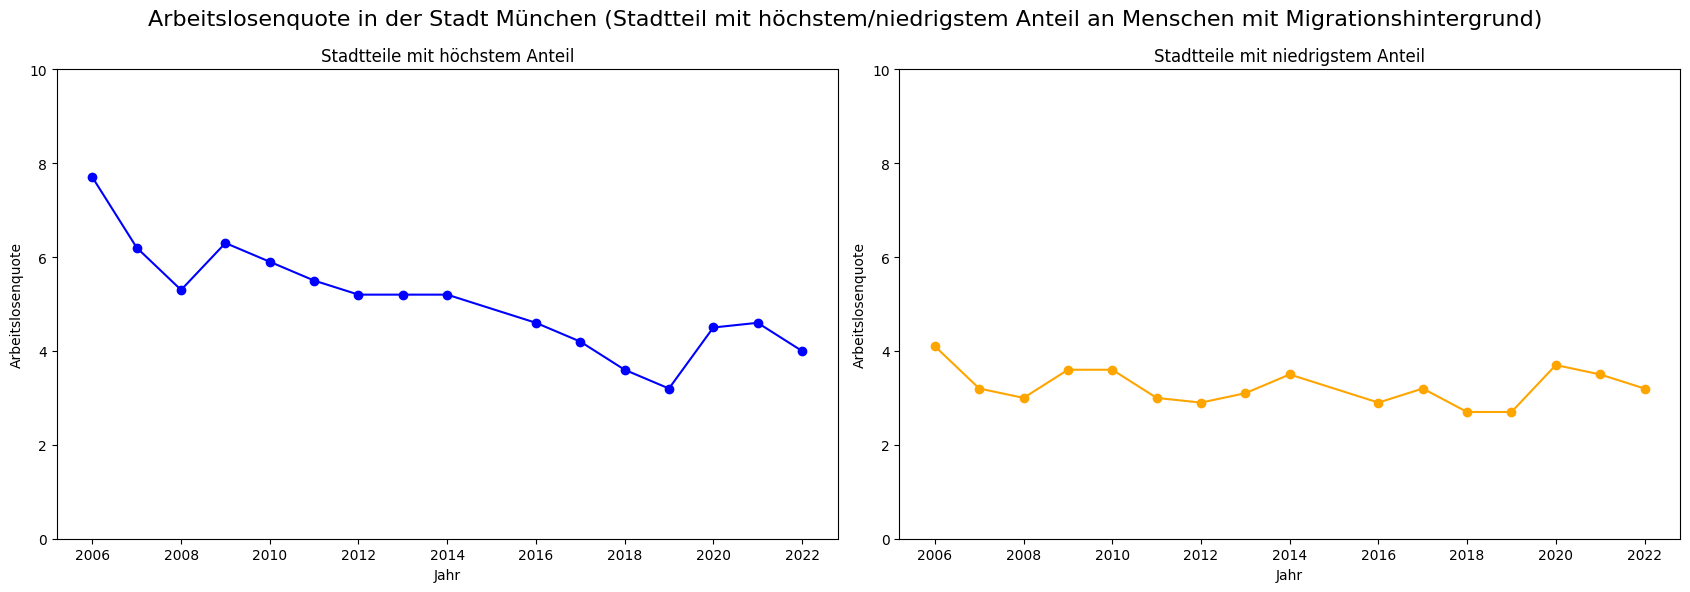

In [25]:
# Daten nach Stadtteilen mit höchster und niedrigstem Anteil an Menschen mit Migrationshintergrund filtern und visualiseren

milbertshofen_arbeitslose_2000_2022 = daten_arbeitslose_stadtteile_insgesamt[daten_arbeitslose_stadtteile_insgesamt["Raumbezug"] == "11 Milbertshofen - Am Hart"]
milbertshofen_arbeitslose_2006_2022_ohne_2015 = milbertshofen_arbeitslose_2000_2022.iloc[:-6].loc[::-1][milbertshofen_arbeitslose_2000_2022.iloc[:-6].loc[::-1]["Jahr"] != 2015]

idx = daten_migrationshintergrund_d_und_nd.groupby("Jahr")["Indikatorwert"].idxmin()

stadtteile = list(daten_migrationshintergrund_d_und_nd.loc[idx]["Raumbezug"])

jahre = list(range(2006, 2015)) + list(range(2016, 2023))

alq_min_mig_stadtteile = []

for jahr, stadtteil in zip(jahre, stadtteile):
    alq_min_mig_jahr =  daten_arbeitslose_stadtteile_insgesamt[(daten_arbeitslose_stadtteile_insgesamt["Jahr"] == jahr) & (daten_arbeitslose_stadtteile_insgesamt["Raumbezug"] == stadtteil)]
    alq_min_mig_stadtteile.append(alq_min_mig_jahr)

alq_min_mig_2006_2022_ohne_2015 = pd.concat(alq_min_mig_stadtteile, axis=0)
fig7, ax7 = plt.subplots(1, 2, figsize=(17, 6))

ax7[0].plot(milbertshofen_arbeitslose_2006_2022_ohne_2015["Jahr"],milbertshofen_arbeitslose_2006_2022_ohne_2015["Indikatorwert"], marker="o", color="blue")
ax7[0].set_title("Stadtteile mit höchstem Anteil")
ax7[0].set_xlabel("Jahr")
ax7[0].set_ylabel("Arbeitslosenquote")
ax7[0].set_ylim(0, 10)

ax7[1].plot(alq_min_mig_2006_2022_ohne_2015["Jahr"], alq_min_mig_2006_2022_ohne_2015["Indikatorwert"], marker="o", color="orange")
ax7[1].set_title("Stadtteile mit niedrigstem Anteil")
ax7[1].set_xlabel("Jahr")
ax7[1].set_ylabel("Arbeitslosenquote")
ax7[1].set_ylim(0, 10)

fig7.suptitle("Arbeitslosenquote in der Stadt München (Stadtteil mit höchstem/niedrigstem Anteil an Menschen mit Migrationshintergrund)", fontsize=16)


plt.tight_layout()
plt.show()

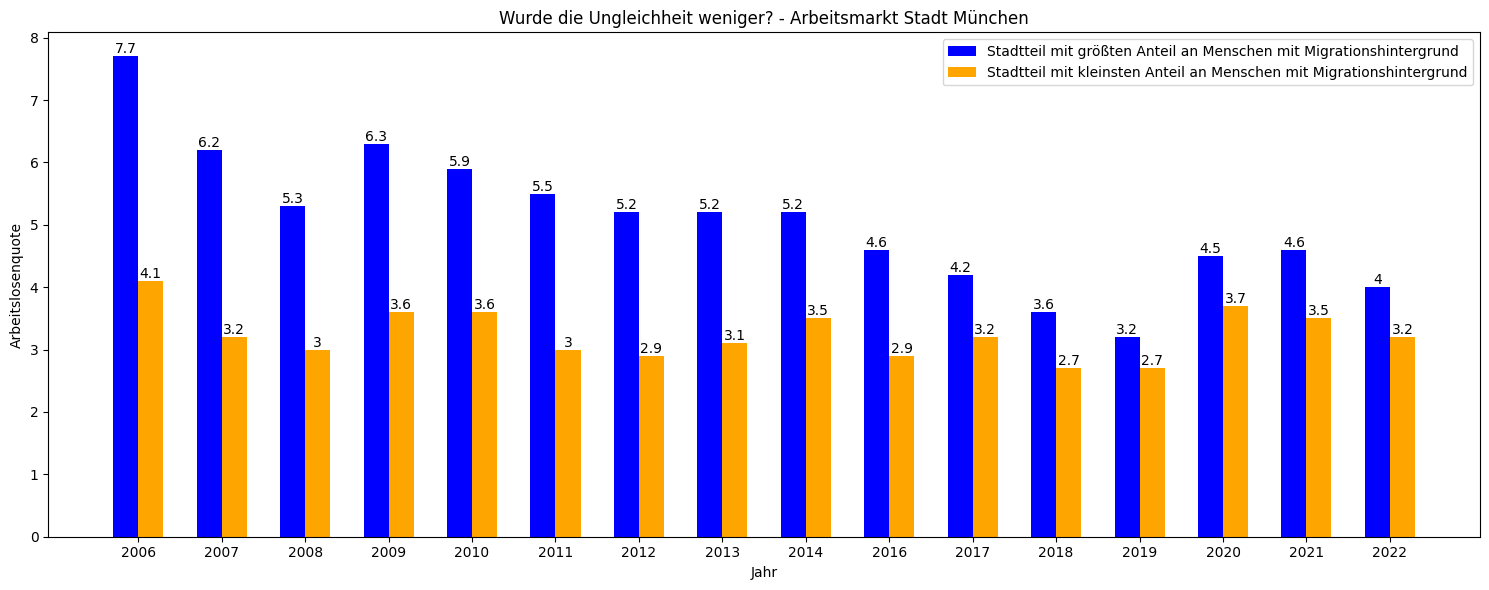

In [26]:
# Vorherige Visualisierungen zusammenführen durch Balkendiagramm
x = np.arange(len(daten_migrationshintergrund_d_und_nd.loc[idx]))

width = 0.3

fig8, ax8 = plt.subplots(figsize=(15, 6))
balken_max_mig = ax8.bar(x - width/2, milbertshofen_arbeitslose_2006_2022_ohne_2015["Indikatorwert"], width, label="Stadtteil mit größten Anteil an Menschen mit Migrationshintergrund", color="blue")
balken_min_mig = ax8.bar(x + width/2, alq_min_mig_2006_2022_ohne_2015["Indikatorwert"], width, label="Stadtteil mit kleinsten Anteil an Menschen mit Migrationshintergrund", color="orange")

ax8.set_xlabel("Jahr")
ax8.set_ylabel("Arbeitslosenquote")
ax8.set_title("Wurde die Ungleichheit weniger? - Arbeitsmarkt Stadt München")
ax8.set_xticks(x)
ax8.set_xticklabels(daten_migrationshintergrund_d_und_nd.loc[idx]["Jahr"])
ax8.legend()
ax8.bar_label(balken_max_mig)
ax8.bar_label(balken_min_mig)

fig8.tight_layout()

plt.show()

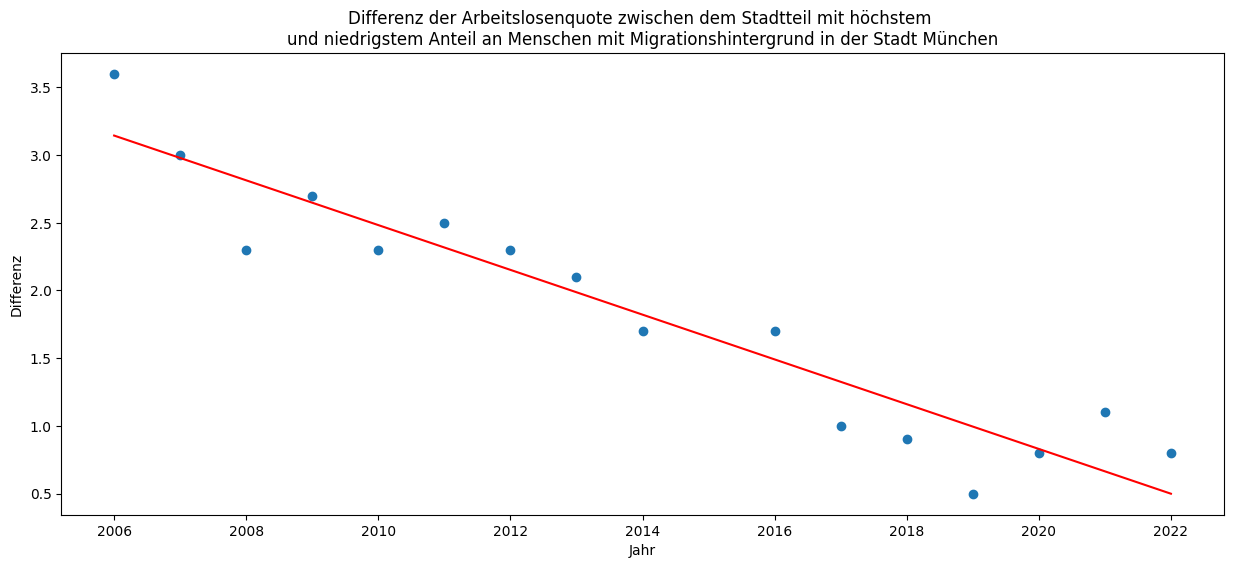

In [27]:
# Durch lineare Regression Gerade durchlegen um Trend zu erkennen
x = milbertshofen_arbeitslose_2006_2022_ohne_2015["Jahr"]
Y1 =list(milbertshofen_arbeitslose_2006_2022_ohne_2015["Indikatorwert"]) 
Y2 = list(alq_min_mig_2006_2022_ohne_2015["Indikatorwert"]) 
y = [y1 - y2 for y1, y2 in zip(Y1, Y2)]

X_fit = np.array(x).reshape(-1, 1)
y_fit = np.array(y)

model = LinearRegression()
model.fit(X_fit, y_fit)

y_pred = model.predict(X_fit)

fig9, ax9 = plt.subplots(figsize=(15, 6))

ax9.scatter(x, y)
ax9.plot(X_fit, y_pred, color="red")
ax9.set_xlabel("Jahr")
ax9.set_ylabel("Differenz")
ax9.set_title("Differenz der Arbeitslosenquote zwischen dem Stadtteil mit höchstem \nund niedrigstem Anteil an Menschen mit Migrationshintergrund in der Stadt München")
fig.tight_layout()
plt.show()


Die Gerade zeigt, dass die Differenz der Arbeistlosenquote zwischen dem Stadtteil mit höchstem und niedrigstem Anteil an Menschen mit Migrationshintergrund in der Stadt München einen sinkenden Trend aufweist. 
<br><br>
Somit wurde das Ziel der geringeren Ungleichheit auf dem Arbeitsmarkt zwischen Menschen mit und ohne Migrationshintergrund gefördert. 
<br><br>
Im Jahr 2022 betrug die Differenz nur noch 0.8 % während sie 2006 noch bei 3.6 % war.
<br><br>
Vor der Corona Pandemie im Jahr 2019 wurde sogar eine Differenz von 0.5 % erreicht. 

#### Hat sich die Arbeitshypothese bestätigt?

Die Info-Grafiken zeigen, dass die Arbeitslosenquote in München bis zur Corona Pandemie kontinuierlich abnahm. 
<br><br>
Desweiteren wurde die Ungleichheit auf dem Arbeitsmarkt zwischen Männern und Frauen, Menschen mit und ohne Migrationshintergrund sowie Deutschen und Nichtdeutschen über die letzten Jahre geringer. 
<br><br>
Dies erkennt man an der gesunkenen Differenz der Arbeitslosenquoten über den Zeitverlauf. Trotzdem ist zu erwähnen, dass es immernoch Ungleichheiten gibt. Vor allem zwischen Deutschen und Nichtdeutschen. Die Differenz der Arbeitslosenquote zwischen ihnen betrug 2022 satte 2.3 %. 
<br><br>
Diesen Wert gilt es in den nächsten Jahren weiterhin zu schmälern und somit auch gegen die verbleibende Ungleichheit zwischen Deutschen und Nichtdeutschen Arbeitern vorzugehen.

Das Ziel der Förderung der produktiven Vollbeschäftigung und reduzieren der Ungleichheiten in der Bevölkerung wurde somit erreicht.
<br><br>
Die Arbeitshypothese hat sich bestätigt.

### Aufgabe 7 (Bonus)<a class="anchor" id="aufgabe7"></a>

In [28]:
# Erstelen einer Interaktiven Grafik der zusammengeführten Balkendiagramme
plotly_fig2 = tls.mpl_to_plotly(fig2)
plotly_fig5 = tls.mpl_to_plotly(fig5)
plotly_fig8 = tls.mpl_to_plotly(fig8)

fig100 = go.Figure()

for trace in plotly_fig2["data"]:
    trace["x"] = list(range(2000, 2023))
    trace.visible = False 
    fig100.add_trace(trace)

for trace in plotly_fig5["data"]:
    trace["x"] = list(range(2000, 2023))
    trace.visible = False  
    fig100.add_trace(trace)

for trace in plotly_fig8["data"]:
    trace["x"] = [year for year in range(2006, 2023) if year != 2015]
    trace.visible = False  
    fig100.add_trace(trace)

fig100.update_layout(
    updatemenus=[
        {
            "buttons": [
                {"label": "Wählen Sie einen Plot", "method": "update", "args": [{"visible": [False] * (len(plotly_fig2["data"]) + len(plotly_fig5["data"]) + len(plotly_fig8["data"]))}]},
                {"label": "Männlich/Weiblich", "method": "update", "args": [{"visible": [True] * len(plotly_fig2["data"]) + [False] * len(plotly_fig5["data"]) + [False] * len(plotly_fig8["data"])}]},
                {"label": "Deutsch/Nichtdeutsch", "method": "update", "args": [{"visible": [False] * len(plotly_fig2["data"]) + [True] * len(plotly_fig5["data"]) + [False] * len(plotly_fig8["data"])}]},
                {"label": "Stadtteil höchster/niedrigster Anteil Migration", "method": "update", "args": [{"visible": [False] * len(plotly_fig2["data"]) + [False] * len(plotly_fig5["data"]) + [True] * len(plotly_fig8["data"])}]}
            ],
            "direction": "down",
            "showactive": True,
        }
    ],
    title={
        "text": "Wurde die Ungleichheit weniger?",
        "x": 0.5,
        "xanchor": "center"},
    xaxis_title="Jahr",
    yaxis_title="Arbeitslosenquote"
)

fig100.show()
None

C:\Users\enesy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotly\matplotlylib\renderer.py:609: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



## Literaturverzeichnis <a class="anchor" id="kapitel2"></a>

Indikatorenatlas: Arbeitsmarkt - Arbeitslosen - Anteil (https://opendata.muenchen.de/dataset/indikatorenatlas-2014-arbeitsmarkt-arbeitslosendichte-83r65mct)
<br><br>
Indikatorenatlas: Bevölkerung - Migrationshintergrund (https://opendata.muenchen.de/dataset/indikatorenatlas-bevoelkerung-migrationshintergrund-83r65mct)

In [29]:
sinfo()

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
matplotlib  3.8.2
numpy       1.26.2
pandas      2.1.3
plotly      5.22.0
sinfo       0.3.4
sklearn     1.4.2
-----
IPython             8.26.0
jupyter_client      8.4.0
jupyter_core        5.4.0
jupyterlab          4.2.3
notebook            7.2.1
-----
Python 3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]
Windows-10-10.0.22631-SP0
8 logical CPU cores, Intel64 Family 6 Model 140 Stepping 1, GenuineIntel
-----
Session information updated at 2024-07-08 16:00
